In [9]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.utils import util

# read configuration file
with open('roman_reproduce.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [10]:
if config['dev']:
    config['pipeline_label'] += '_dev'

In [13]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 161 pickle(s) in /data/bwedig/mejiro/roman_reproduce_dev/03


In [14]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

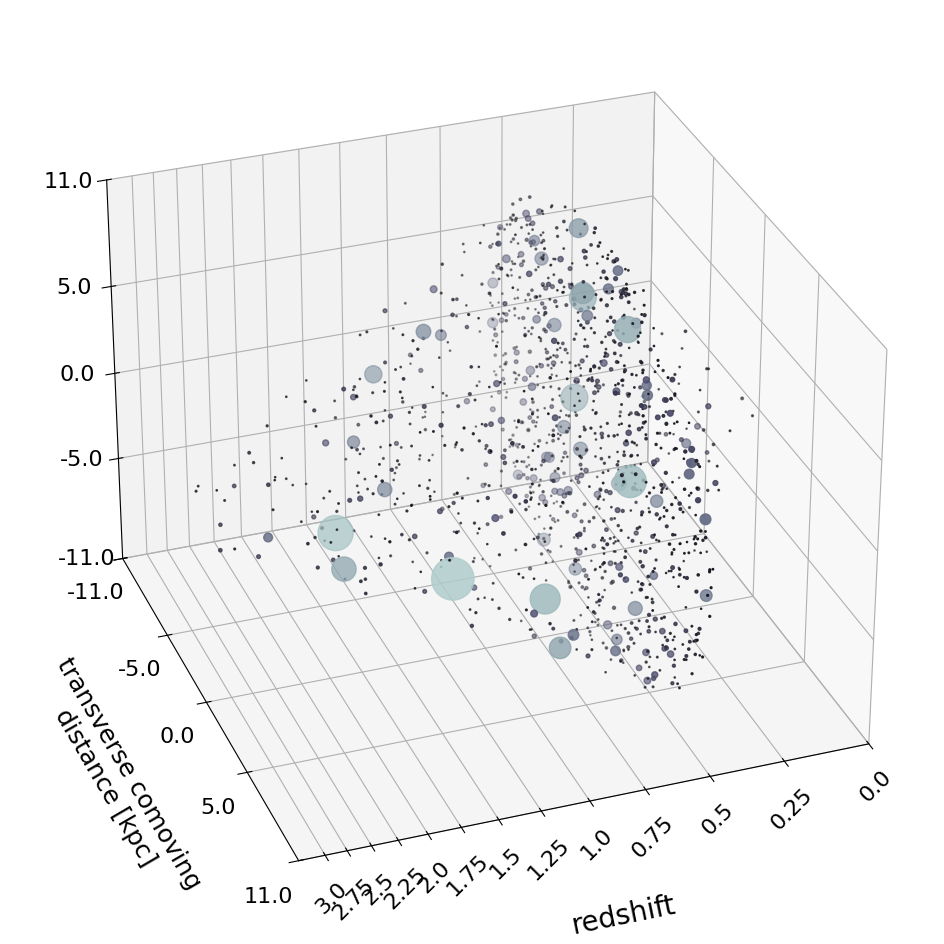

In [15]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

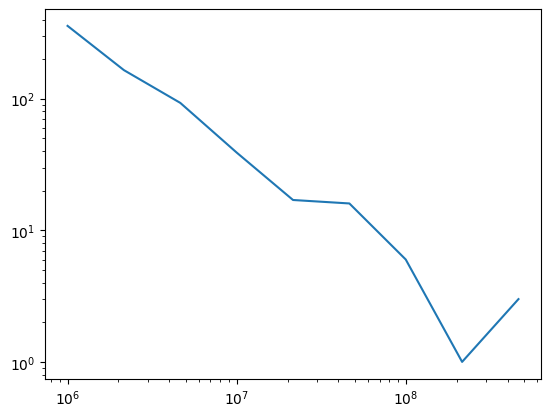

In [16]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.show()

In [17]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 1.23e+09 Msun

{'_args': {},
 '_c': 9.623386367788981,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7f09a39ef970>,
 '_kwargs_lenstronomy': [{'Rs': 0.1557844215,
                          'alpha_Rs': 0.0026466544,
                          'center_x': 0.2499,
                          'center_y': -0.0921,
                          'r_trunc': 2.3797663515459027}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f09a3b6eef0>,
 '_nfw_params': [27167090.820298675, 1.3523434691950786, 13.014123706020378],
 '_profile_args': (9.623386367788981, 20.65863366138103),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationRN object at 0x7f09a39efd00>,
 '_zeval': 1.45,
 'fixed_position': False,
 'is_subhalo': False,
 'lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f09a3b6eef0>,
 'mass': 1230354148.522134,
 'mdef': 'TNFW',
 'r3d': None,
 'tnfw_lenstrono